### 군집
- 분류의 문제에서 결과데이터가 없는 데이터의 결과를 생성하기 위해 사용한다.
- 주어진 데이터를 그룹을 묶어보기 위해 사용한다.

In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 군집 알고리즘
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시간 측정을 위한모듈
import datetime
# 저장을 위한 모듈
import pickle

### K-Means
- 개발자가 군집의 개수를 정해주면 거리가 가까운 데이터들 끼리 정해진 개수만큼 그룹으로 묶인다.
- 극단치 매우 민감하다.
- 대부분의 군집 작업에서 사용된다.

In [16]:
df1 = pd.read_csv('./data/iris.csv')
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [18]:
# n_clusters : 군집의 개수, 센트로이드의 개수
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [19]:
# 군집의 결과를 가져온다.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
# 정확도를 측정하기 위해서 똑같은 값으로 변환한다.
d1 = {
    'setosa' : 1,
    'versicolor' : 0,
    'virginica' : 2
}
y2 = y.map(d1)
y2

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [21]:
r1 = accuracy_score(y2, kmeans.labels_)
r1

0.8933333333333333

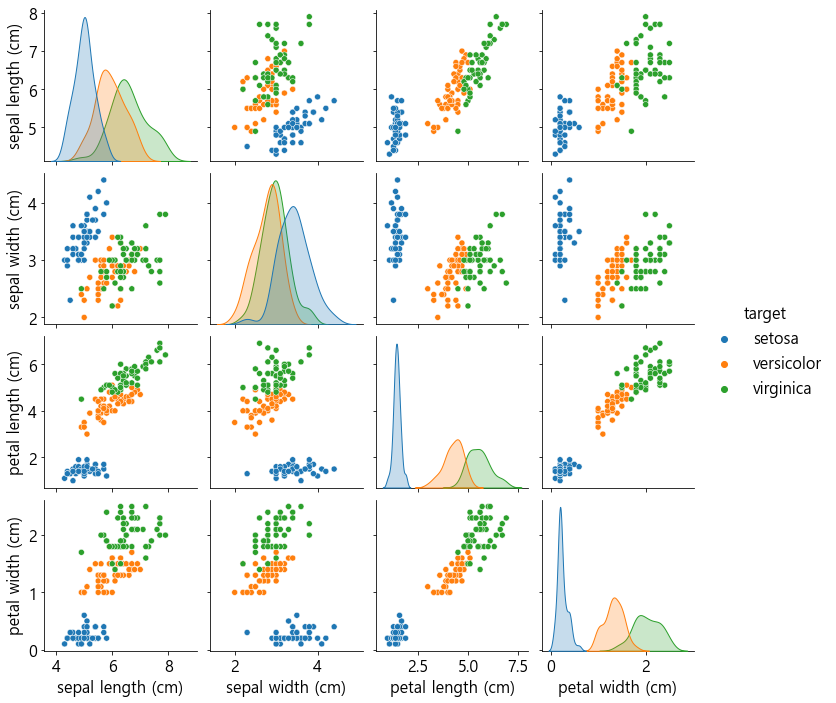

In [8]:
sns.pairplot(data=df1, hue='target')
plt.show()

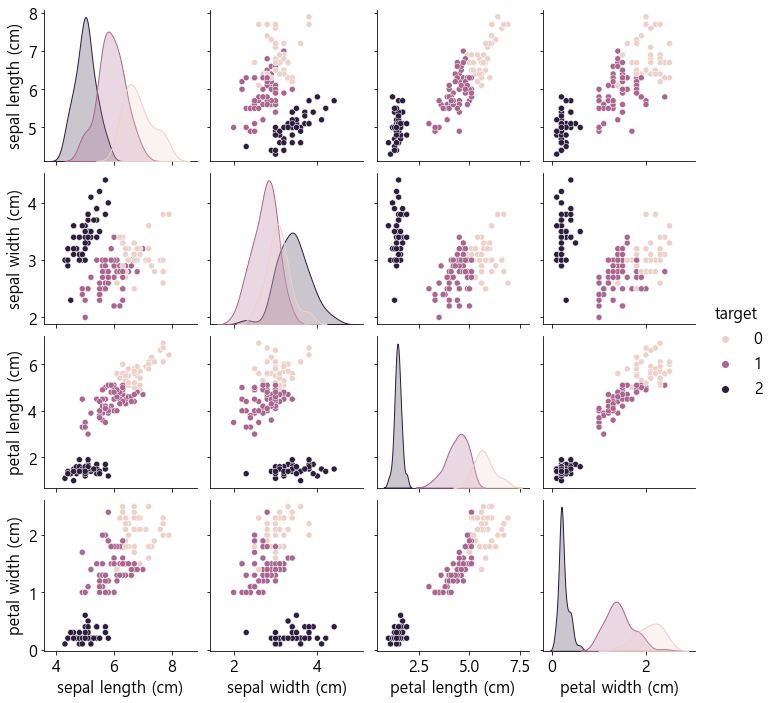

In [9]:
# 군집의 결과를 붙혀준다
X['target'] = kmeans.labels_

# 시각화
sns.pairplot(data=X, hue='target')
plt.show()

### Mean Shift
- 개발자가 정해준 거리를 기반으로 밀집도가 높은 데이터들 끼리 그룹으로 묶는 군집
- 그룹의 개수를 예측이 불가능하며 군집의 수를 줄이려면 반경의 크기를 늘리고 군집의 수를 늘리려면 반경의 크기를 줄인다.

In [10]:
df1 = pd.read_csv('./data/iris.csv')
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
# 입력과 결과로 나눈다
X = df1.drop('target', axis=1)
y = df1['target']

In [12]:
# mean shift
# bandwidth : 그룹의 반경
mean1 = MeanShift(bandwidth=1)
labels = mean1.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# mean shift
# bandwidth : 그룹의 반경
mean1 = MeanShift(bandwidth=0.2)
labels = mean1.fit_predict(X)
labels

array([  0,   1, 105,   6,   0,  90, 105,   0,  19,   1,  16, 103,   1,
       108,  75,  78,  91,   0,  79,   5,  92,   5, 104,  17, 102,   1,
        17,   0,   0,   6,   6,  93,  94,  85,   1,  99,  86,   0,  19,
         0,   0, 106, 107,  98,  96,   1,   5,   6,  16,   0,  32,  51,
        35,  89,  49,  80,  56,  18,  45,  95, 100,  74,  71,   3,  83,
         8,  15,  77,  64,   4,  72,  66,  60,  65,  52,   8,  37,  43,
         3,  81,   4,   4,  14,  69,  15,  68,  41,  61,   2,  88,  87,
         3,  14,  18,   2,   2,   2,  63,  97,   2,  55,  13,  31,  57,
        47,  25, 101,  27,  44,  28,  46,  53,   7,  82,  76,  50,   9,
        21,  24,  70,  33,  84,  23,  11,  39,  29,  11,  12,  10,  30,
        26,  20,  10,  58,  67,  22,  54,   9,  12,   7,  40,  34,  13,
        36,  38,  42,  59,  48,  62,  73], dtype=int64)

In [14]:
mean1 = MeanShift(bandwidth=0.85)
labels = mean1.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

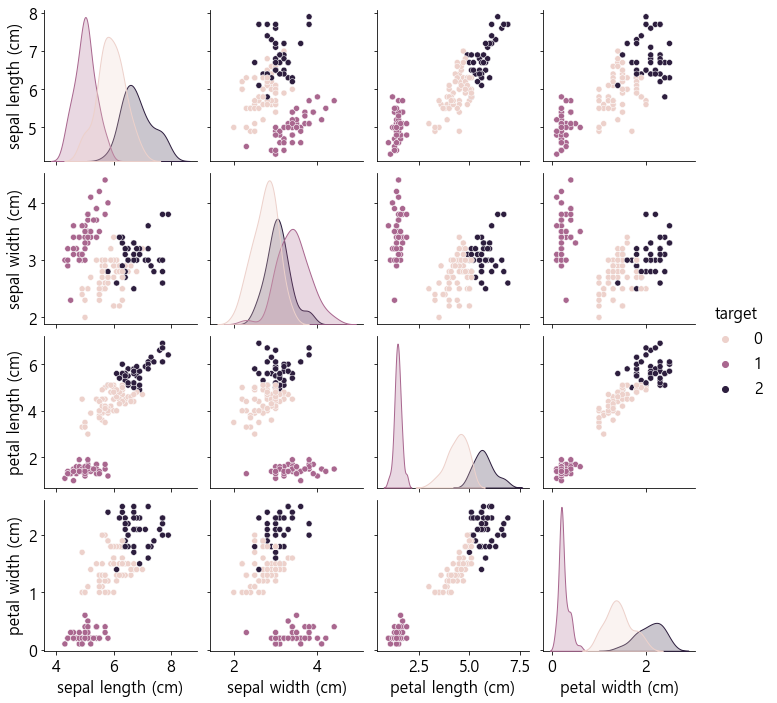

In [15]:
X['target'] = labels

sns.pairplot(data = X, hue='target')